# **Decision Tree Regressor**
### Now as we have completed the theory part of Decision Tree Regressor now let's get some hands on Practical Intution part.

Import required libraries

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset `cardekho.csv`
### Now here in this dataset we have target column as  `Selling Price` means we have to predict the selling price of car

In [96]:
df = pd.read_csv("cardekho_data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Now let's perform some basic EDA operation like viewing columns, Peeking top and last rows, checking for null values and etc..

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [98]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [99]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [100]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

### Plot a histogram (and smooth curve) showing how the selling prices are distributed in our dataset.

<Axes: xlabel='Selling_Price', ylabel='Count'>

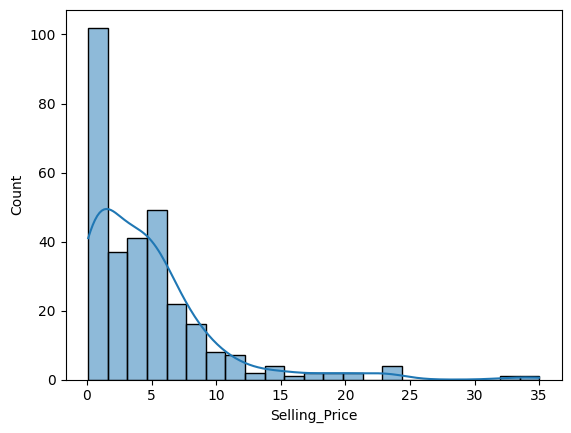

In [101]:
sns.histplot(df['Selling_Price'], kde = True)

### Create a bar chart showing the average selling price for each fuel type (like Petrol, Diesel, CNG).

<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

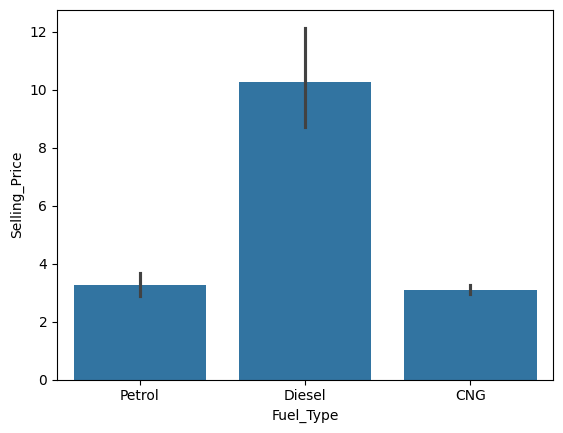

In [102]:
sns.barplot(x = "Fuel_Type", y="Selling_Price", data = df)

### Make a bar chart showing how many cars there are for each transmission type (Manual or Automatic).

<Axes: xlabel='Transmission', ylabel='count'>

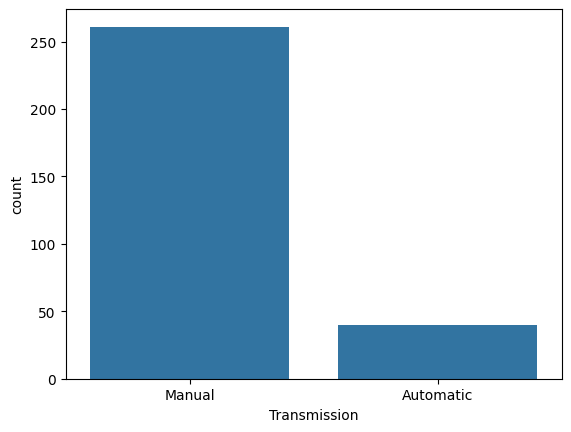

In [103]:
sns.countplot(x = "Transmission", data = df)

### Create a scatter plot showing the relationship between a car’s present price and its selling price, with different colors for each fuel type.

<Axes: xlabel='Present_Price', ylabel='Selling_Price'>

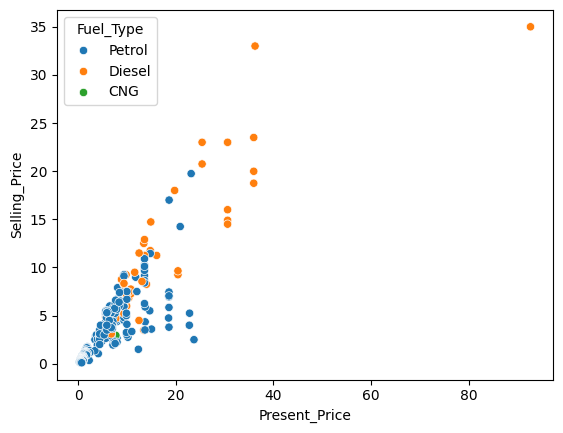

In [104]:
sns.scatterplot(x = "Present_Price", y = "Selling_Price", data = df, hue = "Fuel_Type")

### Create a heatmap showing the correlation between all numeric columns in df, with values annotated and colored from negative (cool) to positive (warm) correlations.

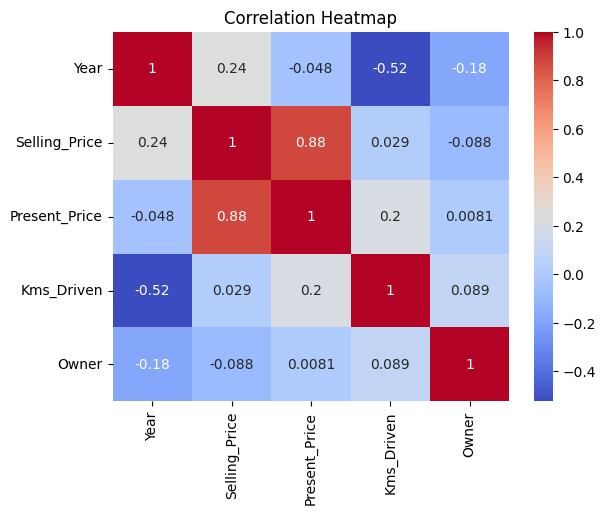

In [105]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Split X and y features.
X → Independent features (input variables, predictors).                                                                         
y → Dependent feature (target variable, output we want to predict).

In [106]:
y = df['Selling_Price']
X = df.drop('Selling_Price', axis = 1)

### We have some object-type columns representing categorical data.
### We will use LabelEncoder(from sklearn.preprocessing) to convert them into numeric labels (0, 1, 2, …) for use in machine learning models.

In [107]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

### We split the data into training and testing sets, with 80% for training and 20% for testing.
### we will import train_test_split from sklearn.model_selection

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Now as we have splitted our Independent and Dependent Features.
### Let's import our DecisionTreeRegressor from sklearn.tree and train our X_train and y_train.

In [109]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

### Now we have trained our model and now it's time to make some prediction on `unseen data (X_test)`.

In [110]:
y_pred = model.predict(X_test)

### Now we are at the final step of our project, which is evaluating the model’s accuracy to see how well it is predicting.

In [111]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.9213874133017622


In [112]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print("Train R2:", train_r2)
print("Test R2:", test_r2)

Train R2: 1.0
Test R2: 0.9213874133017622


### Let's check for some best parameters we can have and the score

In [113]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)

params = {
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "max_depth": np.arange(1, 20, 1),
    "min_samples_split": np.arange(2, 20, 1),
    "min_samples_leaf": np.arange(1, 20, 1),
    "max_features": [None, "sqrt", "log2"],
    "max_leaf_nodes": np.arange(2, 20, 1),
}

# RandomizedSearchCV
grid = RandomizedSearchCV(
    estimator=model,
    param_distributions=params,
    n_iter=100,
    cv=5,
    random_state=42,
    n_jobs=-1
)

grid.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
                   random_state=42)

In [114]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

y_pred_best = best_model.predict(X_test)
print(r2_score(y_test, y_pred_best))

0.9051987628887702


In [115]:
from sklearn.metrics import r2_score

best_model = grid.best_estimator_

# Training accuracy (R2 score on training data)
train_pred = best_model.predict(X_train)
train_r2 = r2_score(y_train, train_pred)
print("Training R2:", train_r2)

# Testing accuracy (R2 score on testing data)
test_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, test_pred)
print("Testing R2:", test_r2)

Training R2: 0.9228682305409823
Testing R2: 0.9051987628887702
